# Check for Data Quality

In [1]:
!pip install great_expectations


In [1]:
import great_expectations as ge

In [14]:
facts_df = ge.read_csv("~/Downloads/d5d02a76721a486a98a744707a5ba53c.csv")

In [15]:
facts_df.head()

,שבוע,חנות - פורמט,שם פריט,מכירות במליוני שקלים,פריט - ברקוד,מכירות באלפי ליטרים,מכירות בטונות,מכירות באלפי יחידות באריזה,מכירות באלפי יחידות צריכה,מחיר ממוצע ליחידה,מחיר ממוצע לליטר,מחיר ממוצע לקילו,מחיר ממוצע ליחידה באריזה,מחיר ממוצע ליחידת צריכה
0,31 - 26\07\2020,חנויות נוחות,ביסלי ט. בצל 70 גרם,0.0028,7290000066158,0.000,0.0323,0.4610,0.0,6.0979,-,87.1125,6.0979,-
1,31 - 26\07\2020,חנויות נוחות,"קוואקר מהיר אטוס לל""ס 500 גר",0.0001,7290000480107,0.000,0.0040,0.0080,0.0,17.5000,-,35.0000,17.5000,-
2,31 - 26\07\2020,חנויות נוחות,היט מיניס קרם קקאו 130גר,0.0004,5901414200411,0.000,0.0057,0.0440,0.0,9.1591,-,70.4545,9.1591,-
3,31 - 26\07\2020,חנויות נוחות,סויה תנובה לייט בטעם טבעי טרי 1ל,0.0004,7290004132552,0.037,0.0000,0.0370,0.0,11.7322,11.7322,-,11.7322,-
4,31 - 26\07\2020,חנויות נוחות,טורטית מגדים 40ג,0.0099,7290106658479,0.000,0.0861,2.1520,0.0,4.5811,-,114.5265,4.5811,-


In [16]:
facts_df['חנות - פורמט'].unique()

array(['חנויות נוחות', 'רשתות ארציות דיסקאונט', 'רשתות ארציות סופרמרקטים',
       'שוק פרטי דיסקאונט', 'שוק פרטי מינימרקטים', 'שוק פרטי קטן'],
      dtype=object)

In [17]:
facts_df.expect_column_distinct_values_to_be_in_set('חנות - פורמט', ['חנויות נוחות', 'רשתות ארציות דיסקאונט', 'רשתות ארציות סופרמרקטים', 'שוק פרטי דיסקאונט', 'שוק פרטי מינימרקטים', 'שוק פרטי קטן'])

{
  "success": true,
  "result": {
    "observed_value": [
      "\u05d7\u05e0\u05d5\u05d9\u05d5\u05ea \u05e0\u05d5\u05d7\u05d5\u05ea",
      "\u05e8\u05e9\u05ea\u05d5\u05ea \u05d0\u05e8\u05e6\u05d9\u05d5\u05ea \u05d3\u05d9\u05e1\u05e7\u05d0\u05d5\u05e0\u05d8",
      "\u05e8\u05e9\u05ea\u05d5\u05ea \u05d0\u05e8\u05e6\u05d9\u05d5\u05ea \u05e1\u05d5\u05e4\u05e8\u05de\u05e8\u05e7\u05d8\u05d9\u05dd",
      "\u05e9\u05d5\u05e7 \u05e4\u05e8\u05d8\u05d9 \u05d3\u05d9\u05e1\u05e7\u05d0\u05d5\u05e0\u05d8",
      "\u05e9\u05d5\u05e7 \u05e4\u05e8\u05d8\u05d9 \u05de\u05d9\u05e0\u05d9\u05de\u05e8\u05e7\u05d8\u05d9\u05dd",
      "\u05e9\u05d5\u05e7 \u05e4\u05e8\u05d8\u05d9 \u05e7\u05d8\u05df"
    ],
    "element_count": 615101,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": null,
  "meta": {}
}

In [18]:
facts_df.describe()

,מכירות במליוני שקלים,פריט - ברקוד,מכירות באלפי ליטרים,מכירות בטונות,מכירות באלפי יחידות צריכה
count,615101.000000,6.151010e+05,615101.000000,615101.000000,615101.0
mean,0.007627,6.532671e+12,0.200029,0.151755,0.0
std,0.035422,2.113366e+12,3.478145,1.192769,0.0
min,-0.013700,6.301600e+04,-0.021400,-0.113800,0.0
25%,0.000200,7.290001e+12,0.000000,0.000400,0.0
50%,0.000900,7.290012e+12,0.000000,0.006900,0.0
75%,0.004400,7.290109e+12,0.000000,0.050100,0.0
max,2.396400,9.720188e+12,407.959400,145.328800,0.0


In [19]:
facts_df.expect_column_max_to_be_between('מכירות במליוני שקלים',2,3)

{
  "success": true,
  "result": {
    "observed_value": 2.3964,
    "element_count": 615101,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": null,
  "meta": {}
}

In [20]:
facts_df['שבוע'].unique()

array(['31 - 26\\07\\2020', '32 - 02\\08\\2020', '33 - 09\\08\\2020',
       '34 - 16\\08\\2020', '35 - 23\\08\\2020', '36 - 30\\08\\2020',
       '37 - 06\\09\\2020', '38 - 13\\09\\2020', '39 - 20\\09\\2020',
       '40 - 27\\09\\2020', '41 - 04\\10\\2020', '42 - 11\\10\\2020'],
      dtype=object)

In [21]:
import pandas as pd
metadata_file = '7013a876be72492e95abc1697ce48f4f.xls'
metadata_df = pd.read_excel(f"~/Downloads/{metadata_file}")

In [22]:
metadata_df.head()

,פריט - תת קטגוריה,שנה,פריט - מותג,מכירות במליוני שקלים,פריט - תת מותג,פריט - קטגוריה,פריט - מחלקה,פריט - ספק,קטלוג פרטי - תת קטגוריה,קטלוג פרטי - מחלקה,קטלוג פרטי - קטגוריה,שם פריט,פריט - ברקוד,מדבקת סימון שומן רווי,מדבקת סימון סוכר,מדבקת סימון נתרן
0,חטיפי חיטה,2020.0,אסלי,0.003541,אסלי,חטיפים,חטיפים מלוחים,א.ס כהן שיווק ישיר בעמ,חטיפי פסטה מטוגנת,עולם המלוחים,חטיפים מלוחים,אסלי מאגדת מיני 70ג,7.290004e+12,לא ידוע,לא ידוע,לא ידוע
1,חטיפי חיטה,2020.0,באגסי,0.172586,באגסי,חטיפים,חטיפים מלוחים,א.מ חטיפי העמק בעמ,חטיפי פסטה מטוגנת,עולם המלוחים,חטיפים מלוחים,באגסי גריל 200 ג,7.290003e+12,לא ידוע,לא ידוע,לא ידוע
2,חטיפי חיטה,2020.0,באגסי,0.155918,באגסי,חטיפים,חטיפים מלוחים,א.מ חטיפי העמק בעמ,חטיפי פסטה מטוגנת,עולם המלוחים,חטיפים מלוחים,באגסי ברביקיו 200 ג,7.290003e+12,לא ידוע,לא ידוע,לא ידוע
3,חטיפי חיטה,2020.0,באגסי,0.200949,באגסי,חטיפים,חטיפים מלוחים,א.מ חטיפי העמק בעמ,חטיפי פסטה מטוגנת,עולם המלוחים,חטיפים מלוחים,באגסי בצל 190 גר,7.290003e+12,לא ידוע,לא ידוע,לא ידוע
4,חטיפי חיטה,2020.0,באגסי,0.158370,באגסי,חטיפים,חטיפים מלוחים,א.מ חטיפי העמק בעמ,חטיפי פסטה מטוגנת,עולם המלוחים,חטיפים מלוחים,באגסי בטעם פיצה 200 גרם,7.290003e+12,לא ידוע,לא ידוע,לא ידוע


In [47]:
facts_df_with_date = (
    facts_df
    .assign(week_number = lambda x : x['שבוע'].str[:2])
    .assign(week_date = lambda x : pd.to_datetime(x['שבוע'].str[-10:], format='%d\%m\%Y', errors='coerce'))
)

In [48]:
merged_df = (
    facts_df_with_date
    .query('week_number > "34"')
    .merge(metadata_df, on='פריט - ברקוד')
)

In [49]:
merged_df.columns

Index(['שבוע', 'חנות - פורמט', 'שם פריט_x', 'מכירות במליוני שקלים_x',
       'פריט - ברקוד', 'מכירות באלפי ליטרים', 'מכירות בטונות',
       'מכירות באלפי יחידות באריזה', 'מכירות באלפי יחידות צריכה',
       'מחיר ממוצע ליחידה', 'מחיר ממוצע לליטר', 'מחיר ממוצע לקילו',
       'מחיר ממוצע ליחידה באריזה', 'מחיר ממוצע ליחידת צריכה', 'week_number',
       'week_date', 'פריט - תת קטגוריה', 'שנה', 'פריט - מותג',
       'מכירות במליוני שקלים_y', 'פריט - תת מותג', 'פריט - קטגוריה',
       'פריט - מחלקה', 'פריט - ספק', 'קטלוג פרטי - תת קטגוריה',
       'קטלוג פרטי - מחלקה', 'קטלוג פרטי - קטגוריה', 'שם פריט_y',
       'מדבקת סימון שומן רווי', 'מדבקת סימון סוכר', 'מדבקת סימון נתרן'],
      dtype='object')

In [94]:
scaled_df = (
    merged_df
    .rename(columns={
        'שבוע':'week_desc',
        'חנות - פורמט':'format_name',
        'מכירות במליוני שקלים_x':'sales_in_m',
        'פריט - ברקוד':'item_id',
        'מכירות באלפי ליטרים':'volume_in_k',
        'מכירות בטונות':'weight_in_tons',
        'מכירות באלפי יחידות באריזה':'quantity_in_k',
        'מחיר ממוצע ליחידה': 'avg_price_units_in_package',
        'מחיר ממוצע לקילו': 'avg_price_weight',
        'מחיר ממוצע לליטר': 'avg_price_volume',
        'פריט - תת קטגוריה': 'public_sub_category',
        'פריט - קטגוריה': 'public_category',
        'פריט - מחלקה': 'public_class',
        'קטלוג פרטי - תת קטגוריה': 'private_sub_category',
        'קטלוג פרטי - קטגוריה': 'private_category',
        'שם פריט': 'item_name',
        'פריט - מותג': 'brand',
        'פריט - תת מותג': 'sub_brand',
        'פריט - ספק': 'supplier_name'
    })
    .assign(weight = lambda x : x.weight_in_tons*1000)
    .assign(volume = lambda x : x.volume_in_k*1000)
    .assign(sales = lambda x : x.sales_in_m*1000*1000)
    .assign(quantity_in_k=lambda x : pd.to_numeric(x.quantity_in_k, errors='coerce'))
    .assign(quantity = lambda x : x.quantity_in_k*1000)
    .assign(avg_price_volume=lambda x : pd.to_numeric(x.avg_price_volume, errors='coerce'))
    .assign(avg_price_weight=lambda x : pd.to_numeric(x.avg_price_weight, errors='coerce'))
    .assign(avg_price_units_in_package=lambda x : pd.to_numeric(x.avg_price_units_in_package, errors='coerce'))
)

In [95]:
scaled_ge_df = ge.from_pandas(
    scaled_df
)

In [96]:
scaled_ge_df.expect_column_mean_to_be_between('sales',1000,20000 )

{
  "success": true,
  "result": {
    "observed_value": 8105.961659946315,
    "element_count": 425821,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": null,
  "meta": {}
}

In [85]:
scaled_ge_df.describe()

,sales_in_m,item_id,volume_in_k,weight_in_tons,quantity_in_k,מכירות באלפי יחידות צריכה,avg_price_volume,שנה,מכירות במליוני שקלים_y,weight,volume,sales,quantity
count,425821.000000,4.258210e+05,425821.000000,425821.000000,425805.000000,425821.0,74471.000000,425821.0,425821.000000,425821.000000,425821.000000,4.258210e+05,425805.000000
mean,0.008106,6.533623e+12,0.211629,0.162567,1.705714,0.0,30.776385,2020.0,1.722092,162.566627,211.629251,8.105962e+03,1705.713649
std,0.036753,2.112647e+12,3.603871,1.259600,11.725253,0.0,35.723541,0.0,6.031041,1259.600327,3603.871437,3.675345e+04,11725.253461
min,-0.013700,6.301600e+04,-0.013000,-0.113800,-2.400000,0.0,-101.539800,2020.0,-0.004496,-113.800000,-13.000000,-1.370000e+04,-2400.000000
25%,0.000200,7.290001e+12,0.000000,0.000500,0.014000,0.0,14.700200,2020.0,0.103198,0.500000,0.000000,2.000000e+02,14.000000
50%,0.001100,7.290012e+12,0.000000,0.008100,0.094200,0.0,24.230700,2020.0,0.341207,8.100000,0.000000,1.100000e+03,94.200000
75%,0.004800,7.290109e+12,0.000000,0.055900,0.552800,0.0,35.025100,2020.0,1.232926,55.900000,0.000000,4.800000e+03,552.800000
max,2.396400,9.720188e+12,407.959400,145.328800,879.135600,0.0,932.424200,2020.0,251.452675,145328.800000,407959.400000,2.396400e+06,879135.600000


array([[<AxesSubplot:title={'center':'sales_in_m'}>,
        <AxesSubplot:title={'center':'item_id'}>,
        <AxesSubplot:title={'center':'volume_in_k'}>],
       [<AxesSubplot:title={'center':'weight_in_tons'}>,
        <AxesSubplot:title={'center':'quantity_in_k'}>,
        <AxesSubplot:title={'center':'מכירות באלפי יחידות צריכה'}>],
       [<AxesSubplot:title={'center':'שנה'}>,
        <AxesSubplot:title={'center':'מכירות במליוני שקלים_y'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'volume'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'quantity'}>]], dtype=object)

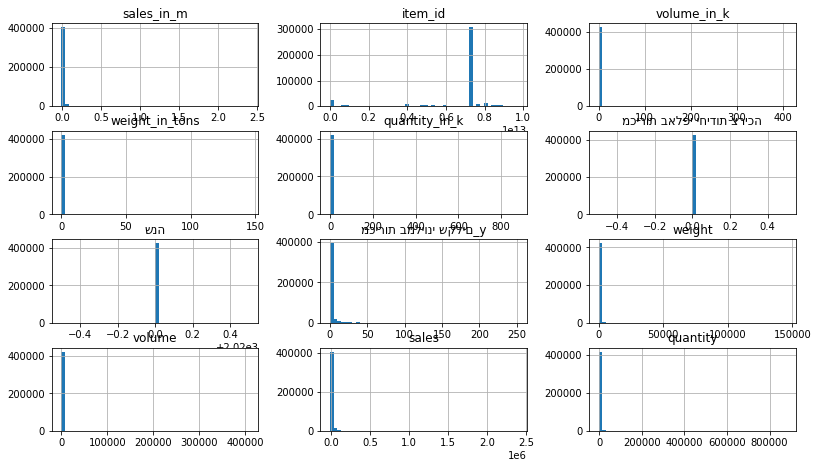

In [76]:
scaled_ge_df.hist(bins=50,figsize=(13.333,7.5))

In [70]:
scaled_ge_df.info()

<class 'great_expectations.dataset.pandas_dataset.PandasDataset'>
Int64Index: 425821 entries, 0 to 425820
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   week_desc                   425821 non-null  object        
 1   format_name                 425821 non-null  object        
 2   שם פריט_x                   425821 non-null  object        
 3   sales_in_m                  425821 non-null  float64       
 4   item_id                     425821 non-null  int64         
 5   volume_in_k                 425821 non-null  float64       
 6   weight_in_tons              425821 non-null  float64       
 7   quantity_in_k               425805 non-null  float64       
 8   מכירות באלפי יחידות צריכה   425821 non-null  float64       
 9   avg_price_units_in_package  425821 non-null  object        
 10  avg_price_volume            425821 non-null  object        
 11  avg_price_w

In [80]:
scaled_ge_df.expect_column_median_to_be_between('quantity',800,1000)

{
  "success": false,
  "result": {
    "observed_value": 94.2,
    "element_count": 425821,
    "missing_count": 16,
    "missing_percent": 0.003757447378123672
  },
  "exception_info": null,
  "meta": {}
}

In [77]:
scaled_ge_df.expect_column_mean_to_be_between('volume',150000,200000,meta={"notes": "The scaling might fail"})

{
  "success": false,
  "result": {
    "observed_value": 211.62925149299824,
    "element_count": 425821,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": null,
  "meta": {
    "notes": "The scaling might fail"
  }
}

In [99]:
scaled_ge_df.expect_column_mean_to_be_between('weight',150000,200000,meta={"notes": "The scaling might fail"})

{
  "success": false,
  "result": {
    "observed_value": 162.566626587228,
    "element_count": 425821,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": null,
  "meta": {
    "notes": "The scaling might fail"
  }
}

In [87]:
scaled_ge_df.expect_column_mean_to_be_between('avg_price_volume',4,35)

{
  "success": true,
  "result": {
    "observed_value": 30.776385237206423,
    "element_count": 425821,
    "missing_count": 351350,
    "missing_percent": 82.5111960189845
  },
  "exception_info": null,
  "meta": {}
}

In [92]:
scaled_ge_df.expect_column_mean_to_be_between('avg_price_weight',50,100)

{
  "success": true,
  "result": {
    "observed_value": 74.53941746661596,
    "element_count": 425821,
    "missing_count": 78799,
    "missing_percent": 18.50519349679795
  },
  "exception_info": null,
  "meta": {}
}

In [98]:
scaled_ge_df.expect_column_mean_to_be_between('avg_price_units_in_package',10,100)

{
  "success": true,
  "result": {
    "observed_value": 13.446193705436075,
    "element_count": 425821,
    "missing_count": 14053,
    "missing_percent": 3.3002130002982475
  },
  "exception_info": null,
  "meta": {}
}

In [ ]:
import io
f = io.BytesIO()
scaled_df.to_parquet(f)
    
